# Data Analysis

## Import Packages and Prepare Data

In [1]:
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.iolib.summary2 import summary_col

In [2]:
df = pd.read_csv('final_with_scores.csv', low_memory=False)
df.head()

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,clean_post,Liberty/oppression
0,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 13:00:28 EDT,...,-0.121268,-0.095777,0.006735,-0.070749,-0.175241,0.777778,0.000574,0.004499,senator ask dot remove expiration date pandemi...,NaN
1,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 09:27:09 EDT,...,-0.120624,-0.086392,-0.081137,-0.065666,-0.057119,0.777778,0.000388,0.000599,fauci warn may soon two america divide widen v...,0.653061
2,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 09:15:16 EDT,...,-0.126078,-0.013716,-0.024528,0.061423,0.024422,1.166667,0.000080,0.004956,we surgeon general concerned delta variant ris...,0.673469
3,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 06:30:09 EDT,...,-0.225778,-0.271310,-0.171173,-0.157422,-0.168818,1.000000,0.000757,0.002340,kim jong un warn grave consequence covid incident,NaN
4,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 00:32:08 EDT,...,-0.005410,-0.126836,0.119250,0.061201,-0.044982,0.750000,0.004427,0.009026,pandemic make vicious cycle even bad low incom...,0.428571


In [3]:
# generate radom number to post id.
def generate_id(s):
    return abs(hash(s)) % (10 ** 10)

df.insert(0, "Post Id", df['Post Created'].apply(generate_id), True)

In [4]:
df.head()

,Post Id,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,clean_post,Liberty/oppression
0,2451107722,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.121268,-0.095777,0.006735,-0.070749,-0.175241,0.777778,0.000574,0.004499,senator ask dot remove expiration date pandemi...,NaN
1,9803821826,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.120624,-0.086392,-0.081137,-0.065666,-0.057119,0.777778,0.000388,0.000599,fauci warn may soon two america divide widen v...,0.653061
2,8697104574,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.126078,-0.013716,-0.024528,0.061423,0.024422,1.166667,0.000080,0.004956,we surgeon general concerned delta variant ris...,0.673469
3,6451078926,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.225778,-0.271310,-0.171173,-0.157422,-0.168818,1.000000,0.000757,0.002340,kim jong un warn grave consequence covid incident,NaN
4,2439665470,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.005410,-0.126836,0.119250,0.061201,-0.044982,0.750000,0.004427,0.009026,pandemic make vicious cycle even bad low incom...,0.428571


In [5]:
word_count = []
# count number of word in each row of the column of "Link Text"
split_string = df['Link Text'].str.split()
for string in split_string:
    words = len(string)
    word_count.append(words)     

In [6]:
# create a new column and gives it the value of the right side. 
df['word_count'] = word_count

In [7]:
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])
df['Page Created'] = pd.to_datetime(df['Page Created'])

df['Post_Created_Month'] = df['Post Created Date'].dt.month
df['Page_Created_Month'] = df['Page Created'].dt.month

In [8]:
# rename the column
df['liberty_p'] = df['Liberty/oppression']

In [9]:
# change missing to 0
df['liberty_p'] = df['liberty_p'].fillna(0)

In [10]:
df2 = pd.DataFrame()

df2[["Post Id", 'Facebook Id','Post Created Date','care_p', 'fairness_p', 'loyalty_p','authority_p', 
         'sanctity_p', 'Likes', 'Comments', 'Angry', 'PN', 'LNC_category', 'Page Created', 'Type', 'Link Text', 'word_count','Followers_at_Posting',  'Post_Created_Month', 'Page_Created_Month', 'liberty_p']] = df[["Post Id", 'Facebook Id', 'Post Created Date','care_p', 'fairness_p', 'loyalty_p','authority_p', 
         'sanctity_p', 'Likes', 'Comments', 'Angry', 'PN', 'LNC_category', 'Page Created', 'Type', 'Link Text', 'word_count', 'Followers at Posting', 'Post_Created_Month', 'Page_Created_Month', 'liberty_p']]

## Correlation of Features

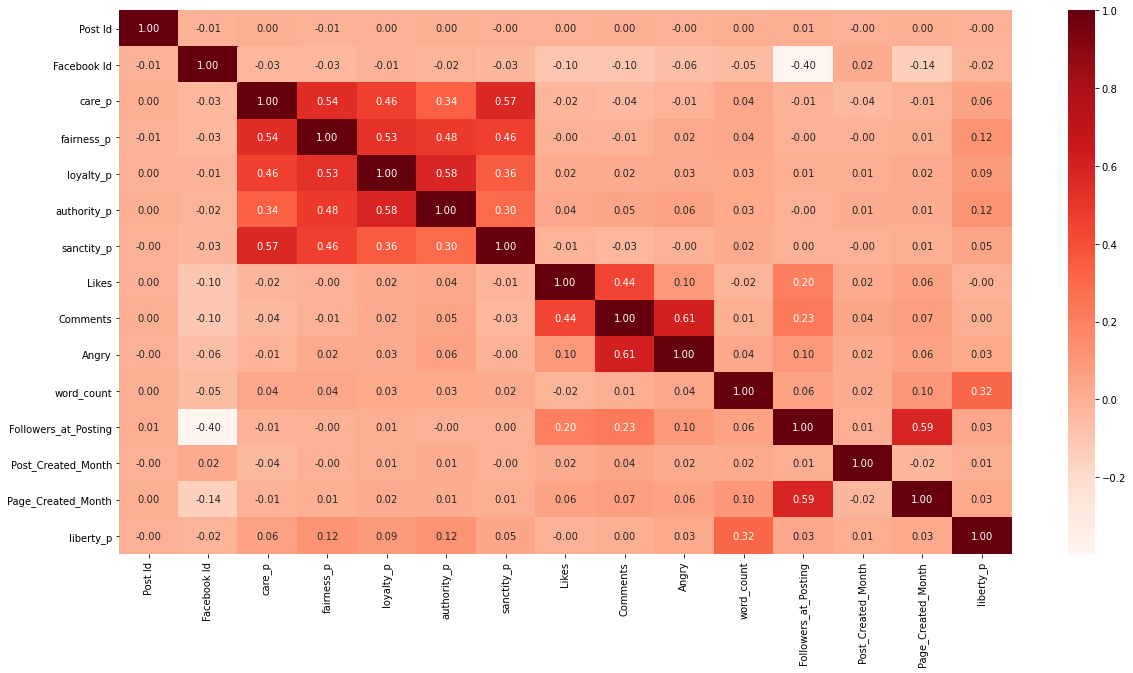

In [11]:
corr = df2.corr()
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

<font size = 3><b>Further Elaboration of Correlation:</font></b>

The correlation coefficient has values between -1 to 1.

    A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    A value closer to 1 implies stronger positive correlation 
    A value closer to -1 implies stronger negative correlation  

## Distribution of Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84385 entries, 0 to 84384
Data columns (total 65 columns):
 #   Column                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                --------------  -----         
 0   Post Id                                                                                                               84385 non-null  int64         
 1   Page Name                                                                                                             84385 non-null  object        
 2   User Name                                                                                                             84385 non-null  object        
 3   Facebook Id                                                                                                         

__Inferece:__ Taking log-transform normalization of all independent variables to handle highly skewed pattern.

In [15]:
df['log_Likes'] = np.log(df2['Likes']+1)
df['log_comments'] = np.log(df2['Comments']+1)
df['log_Angry'] = np.log(df2['Angry']+1)

In [16]:
df2['log_Likes'] = np.log(df2['Likes']+1)
df2['log_comments'] = np.log(df2['Comments']+1)
df2['log_Angry'] = np.log(df2['Angry']+1)

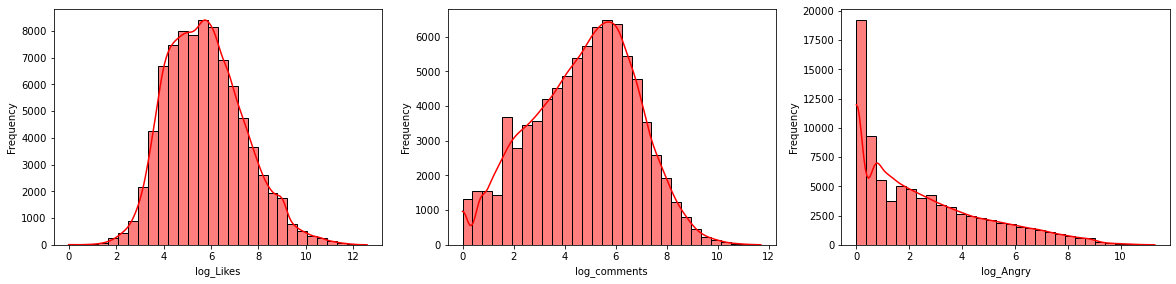

In [17]:
plt.figure(figsize=(20, 20))

for e, column in enumerate(['log_Likes', 'log_comments', 'log_Angry']):
    plt.subplot(4, 3, e + 1)
    sns.histplot(df[column],bins=30,color="r", kde=True)
    plt.ylabel('Frequency')

## Regressions on Full Data & Subgroups

In [18]:
liberal_data = df2[df2['LNC_category'] == 'liberal']
neutral_data = df2[df2['LNC_category'] == 'neutral']
conservative_data = df2[df2['LNC_category'] == 'conservative']
science_data = df2[df2['LNC_category'] == 'science']

In [19]:
# For full sample
full_sample = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(full_sample.summary())

# for sub groups
i = 2
Models_1 =[]
for df in [liberal_data, neutral_data, conservative_data, science_data]:
    model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + Followers_at_Posting + C(PN)",
    data = df2.dropna(), groups= "Facebook Id").fit()
    Models_1.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1
    #Model 1: full sample 
    #Model 2: liberal
    #Model 3: conservative
    #Model 4: neutral 
    #Model 5: science channel 

Model:  1
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       61463         Method:                   REML       
No. Groups:             39            Scale:                    1.3954     
Min. group size:        1             Log-Likelihood:           -97584.2729
Max. group size:        17753         Converged:                Yes        
Mean group size:        1576.0                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        5.284    0.801   6.597 0.000  3.714  6.854
C(Type)[T.Live Video Complete]  -1.205    0.101 -11.938 0.000 -1.403 -1.007
C(Type)[T.Live Video Scheduled] -1.400    0.147  -9.531 0.000 -1.687 -1.112
C(Type)[T.Native Vide

Model:  5
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       61463         Method:                   REML       
No. Groups:             39            Scale:                    1.3954     
Min. group size:        1             Log-Likelihood:           -97587.7920
Max. group size:        17753         Converged:                Yes        
Mean group size:        1576.0                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        4.072    0.388  10.490 0.000  3.311  4.833
C(Type)[T.Live Video Complete]  -1.205    0.101 -11.937 0.000 -1.402 -1.007
C(Type)[T.Live Video Scheduled] -1.398    0.147  -9.522 0.000 -1.686 -1.110
C(Type)[T.Native Vide

In [20]:
# For full sample
full_sample = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(full_sample.summary())

# for sub groups
i = 2
Models_1 =[]
for df in [liberal_data, neutral_data, conservative_data, science_data]:
    model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + Followers_at_Posting + C(PN)",
    data = df2.dropna(), groups= "Facebook Id").fit()
    Models_1.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1
    #Model 1: full sample 
    #Model 2: liberal
    #Model 3: conservative
    #Model 4: neutral 
    #Model 5: science channel 

Model:  1
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       61463         Method:                   REML       
No. Groups:             39            Scale:                    1.3954     
Min. group size:        1             Log-Likelihood:           -97584.2729
Max. group size:        17753         Converged:                Yes        
Mean group size:        1576.0                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        5.284    0.801   6.597 0.000  3.714  6.854
C(Type)[T.Live Video Complete]  -1.205    0.101 -11.938 0.000 -1.403 -1.007
C(Type)[T.Live Video Scheduled] -1.400    0.147  -9.531 0.000 -1.687 -1.112
C(Type)[T.Native Vide

Model:  5
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       61463         Method:                   REML       
No. Groups:             39            Scale:                    1.3954     
Min. group size:        1             Log-Likelihood:           -97587.7920
Max. group size:        17753         Converged:                Yes        
Mean group size:        1576.0                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        4.072    0.388  10.490 0.000  3.311  4.833
C(Type)[T.Live Video Complete]  -1.205    0.101 -11.937 0.000 -1.402 -1.007
C(Type)[T.Live Video Scheduled] -1.398    0.147  -9.522 0.000 -1.686 -1.110
C(Type)[T.Native Vide

In [21]:
print('Model 1')
print(summary_col([full_sample],stars=True))
i = 2
from statsmodels.iolib.summary2 import summary_col

for reg in Models_1:
    print("Model: ", i)
    print(summary_col([reg],stars=True))
    i +=1

Model 1

                                log_Likes 
------------------------------------------
Intercept                       5.2840*** 
                                (0.8010)  
C(Type)[T.Live Video Complete]  -1.2048***
                                (0.1009)  
C(Type)[T.Live Video Scheduled] -1.3995***
                                (0.1468)  
C(Type)[T.Native Video]         -0.1597***
                                (0.0203)  
C(Type)[T.Photo]                0.6207*** 
                                (0.0337)  
C(Type)[T.Status]               -0.5625***
                                (0.2076)  
C(Type)[T.Video]                -0.4702***
                                (0.1420)  
C(Type)[T.YouTube]              -0.7015   
                                (0.5441)  
C(PN)[T.P]                      0.0057    
                                (0.0172)  
C(LNC_category)[T.liberal]      -0.7188   
                                (0.7878)  
C(LNC_category)[T.neutral]      -1.1051   
  

In [22]:
# For full sample
full_sample = smf.mixedlm("log_comments ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + liberty_p+ \
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)",
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(model.summary())
    
# for sub-groups    
i = 2
Models_2 = []
for df in [liberal_data, neutral_data, conservative_data, science_data]:
    model = smf.mixedlm("log_comments ~ care_p + fairness_p + loyalty_p+authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month + word_count  + C(Type) + Followers_at_Posting + C(PN)",
    data = df2.dropna(), groups= "Facebook Id").fit()
    Models_2.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1
    #Model 1: full sample 
    #Model 2: liberal
    #Model 3: conservative
    #Model 4: neutral 
    #Model 5: science channel 

Model:  1
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       61463         Method:                   REML       
No. Groups:             39            Scale:                    1.3954     
Min. group size:        1             Log-Likelihood:           -97587.7920
Max. group size:        17753         Converged:                Yes        
Mean group size:        1576.0                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        4.072    0.388  10.490 0.000  3.311  4.833
C(Type)[T.Live Video Complete]  -1.205    0.101 -11.937 0.000 -1.402 -1.007
C(Type)[T.Live Video Scheduled] -1.398    0.147  -9.522 0.000 -1.686 -1.110
C(Type)[T.Native Vide

Model:  5
                  Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      log_comments
No. Observations:       61463        Method:                  REML        
No. Groups:             39           Scale:                   1.8883      
Min. group size:        1            Log-Likelihood:          -106881.1639
Max. group size:        17753        Converged:               Yes         
Mean group size:        1576.0                                            
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        2.835    0.453  6.259 0.000  1.947  3.723
C(Type)[T.Live Video Complete]  -0.566    0.117 -4.820 0.000 -0.796 -0.336
C(Type)[T.Live Video Scheduled] -1.106    0.171 -6.476 0.000 -1.441 -0.771
C(Type)[T.Native Video]         -0